In [16]:
from random import shuffle
from bloom_filter import BloomFilter
import matplotlib.pyplot as plt
import time
import sys

# Exam

## Statistics

### What is data structure?
In computer science, a data structure is a data organization, management, and storage format that enables efficient access and modification. More precisely, a data structure is a collection of data values, the relationships among them, and the functions or operations that can be applied to the data.

### What is a probabilistic data structure?
Probabilistic data structures are a group of data structures that are extremely useful for big data and streaming applications. Generally speaking, these data structures use hash functions to randomize and compactly represent a set of items. Collisions are ignored but errors can be well-controlled under certain threshold. Comparing with error-free approaches, these algorithms use much less memory and have constant query time. They usually support union and intersection operations and therefore can be easily parallelized.

#### What advantages do these structures provide?
Probabilistic data structures can't give you a definite answer, instead they provide you with a reasonable approximation of the answer and a way to approximate this estimation. They are extremely useful for big data and streaming application because they allow to dramatically decrease the amount of memory needed (in comparison to data structures that give you exact answers).

In majority of the cases these data structures use hash functions to randomize the items. Because they ignore collisions they keep the size constant, but this is also a reason why they can't give you exact values. The advantages they bring:

- they use small amount of memory (you can control how much)
- they can be easily parallelizable (hashes are independent)
- they have constant query time (not even amortized constant like in dictionary)

### Bloom Filter
The Bloom filter is a space-efficient probabilistic data structure that is used to test whether an element is a member of a set.  
The price we pay for efficiency is that it is probabilistic in nature that means, there might be some False Positive results. False positive means, it might tell that given username is already taken but actually it’s not. Bloom filters are both fast and space-efficient. However, elements can only be added, not removed.

For example, checking availability of username is set membership problem, where the set is the list of all registered username.

Boom filter requires these three inputs:
* m: size of the bit array
* n: estimated insertion
* p: false positive probability

An empty Bloom filter is a bit array of m bits, all set to 0. There are also k different hash functions, each of which maps a set element to one of the m bit positions.
* To add an element, feed it to the hash functions to get k bit positions, and set the bits at these positions to 1.
* To test if an element is in the set, feed it to the hash functions to get k bit positions.
    * If any of the bits at these positions is 0, the element definitely isn’t the set.
    * If all are 1, then the element may be in the set.

For understanding bloom filters, you must know what is hashing.<br>
A hash function takes input and outputs a unique identifier of fixed length which is used for identification of input.<br> 
A hash function is a function that takes a set of inputs of any arbitrary size and fits them into a table or other data structure that contains fixed-size elements.

### How does the structure work?
First of all an empty bloom filter is a bit array of m bits, all set to zero, like that one:
<img src="Images/bloom_filter1.png">
We need k number of hash functions to calculate the hashes for a given input. When we want to add an item in the filter, the bits at k indices h1(x), h2(x), … hk(x) are set, where indices are calculated using hash functions. Example – Suppose we want to enter “geeks” in the filter, we are using 3 hash functions and a bit array of length 10, all set to 0 initially. First we’ll calculate the hashes as following :

<br><center>h1("geeks") % 10 = 1 <br>
h1("geeks") % 10 = 4 <br>
h1("geeks") % 10 = 7</center><br>

Now we are going to set the indexes on positions 1, 4 and 7 to 1.<br>
<img src="Images/bloom_filter2.png">

And if we want to enter a word, for example. First we will calculate the hashes.

<br><center>h1(“nerd”) % 10 = 3<br>
h2(“nerd”) % 10 = 5<br>
h3(“nerd”) % 10 = 4</center>

So we will set the indexes on positions 3, 5 and 4 to 1.<br>
<img src="Images/bloom_filter3.png">

Now if we want to check “geeks” is present in filter or not. We’ll do the same process but this time in reverse order. We calculate respective hashes using h1, h2 and h3 and check if all these indices are set to 1 in the bit array. If all the bits are set then we can say that “geeks” is probably present. If any of the bit at these indices are 0 then “geeks” is definitely not present.

But why do we called it probably present. Isn't it uncertain? Let's suppose we want to check whether “cat” is present or not. We’ll calculate hashes using h1, h2 and h3.

<center>h1(“cat”) % 10 = 1<br>
h2(“cat”) % 10 = 3<br>
h3(“cat”) % 10 = 7</center>

If we check the bit array, bits at these indices are set to 1 but we know that “cat” was never added to the filter. Bit at index 1 and 7 was set when we added “geeks” and bit 3 was set we added “nerd”.
<img src="Images/bloom_filter4.png">

So, because bits at calculated indices are already set by some other item, bloom filter erroneously claim that “cat” is present and generating a false positive result. Depending on the application, it could be huge downside or relatively okay.
We can control the probability of getting a false positive by controlling the size of the Bloom filter. More space means fewer false positives. If we want decrease probability of false positive result, we have to use more number of hash functions and larger bit array. This would add latency in addition of item and checking membership. 

#### What operations can be done?
Operations that a Bloom Filter supports  

* add(x) : insert an element into the Bloom Filter.
* check(x) : checks whether an element is already present in the Bloom Filter with a positive false probability.

#### Probability of False positivity:
To calculate the **Probability of False positive**, marked with p, we need:
* m - size of bit array
* k - number of hash functions
* n - number of expected elements to be inserted in the Bloom Filter

We will mark false positive probability with p and can calculate it as:

$$P = (1 - [1 - \frac{1}{m}]^{kn})^k$$

#### Size of Bit Array
To calculate the size of the bit array(**m**) we need:
* n - number of expected elements to be inserted in the Bloom Filter
* p - false positive probability

We can calculate **m** with the formula:

$$m = \frac{n\ln{P}}{(\ln2)^2}$$

#### Number of hash functions
To calculate the most optimum number of hash functions(**k**), we will need:
* m - size of bit array
* n - number of expected elements to be inserted in the Bloom Filter

We'll be calculating **k** as:

$$k = \frac{m}{n}\ln{2}$$

### Blooms' filter performance
A Bloom filter with one hash function is equivalent to ordinary hashing. Bloom filter is a generalization of hashing. It allows for more interesting design tradeoffs.
The complexity to add an element or to query the filter is fixed at O(k). In other words, it's independent of how many items have been added to the filter.
Bloom filter simplifies some operations. Suppose we have two filters to represents sets S1 and S2. The union of the these two sets is simply an OR operation of the two filters. Intersection of the two sets can also be approximated with the filters. Another trick is to half the size of the filter with an OR operation of the first and second halves of the filter.

In [17]:
n = 2 # no of items to add
p = 0.5 # false positive probability

bloomf = BloomFilter(n,p)
print(f"Size of bit array: {bloomf.size}")
print(f"False positive Probability: {bloomf.fp_prob} %")
print(f"Number of hash functions: {bloomf.hash_count}\n")

# words to be added
word_present = ['abound','abounds','abundance','abundant','accessable',
				'bloom','blossom','bolster','bonny','bonus','bonuses',
				'coherent','cohesive','colorful','comely','comfort',
				'gems','generosity','generous','generously','genial']

# word not added
word_absent = ['bluff','cheater','hate','war','humanity',
			'racism','hurt','nuke','gloomy','facebook',
			'geeksforgeeks','twitter']

for item in word_present:
	bloomf.add(item)

shuffle(word_present)
shuffle(word_absent)

test_words = word_present[:10] + word_absent
shuffle(test_words)
for word in test_words:
	if bloomf.check(word):
		if word in word_absent:
			print("'{}' is a false positive!".format(word))
		else:
			print("'{}' is probably present!".format(word))
	else:
		print("'{}' is definitely not present!".format(word))

Size of bit array: 2
False positive Probability: 0.5 %
Number of hash functions: 0

'comely' is probably present!
'hate' is a false positive!
'coherent' is probably present!
'generous' is probably present!
'generously' is probably present!
'blossom' is probably present!
'war' is a false positive!
'bloom' is probably present!
'gloomy' is a false positive!
'facebook' is a false positive!
'cheater' is a false positive!
'twitter' is a false positive!
'comfort' is probably present!
'abundant' is probably present!
'cohesive' is probably present!
'hurt' is a false positive!
'racism' is a false positive!
'geeksforgeeks' is a false positive!
'nuke' is a false positive!
'bluff' is a false positive!
'abundance' is probably present!
'humanity' is a false positive!


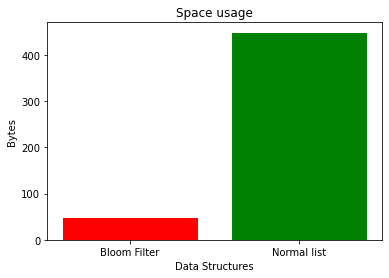

In [13]:
left = [1, 2]
height = [48, 448]

tick_label = ['Bloom Filter', 'Normal list']  
plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['red', 'green'])
  
plt.xlabel('Data Structures')
plt.ylabel('Bytes')
plt.title('Space usage')

plt.show()

In [88]:
n = 2
p = 0.5

bloomf = BloomFilter(n,p)
print(f"Size of bit array: {bloomf.size}")
print(f"False positive Probability: {bloomf.fp_prob} %")
print(f"Number of hash functions: {bloomf.hash_count}\n")

print("#1")
t0 = time.perf_counter()
for item in range(0, 100000, 1):
	bloomf.add("item")
t1 = time.perf_counter()
bloom_filter_time = t1 - t0

print("#2")
test_list = []
t0 = time.perf_counter()
for item in range(0, 100000, 1):
	test_list.append("item")
t1 = time.perf_counter()
list_time = t1 - t0

print(bloom_filter_time > list_time)
print(bloom_filter_time)
print(list_time)

Size of bit array: 2
False positive Probability: 0.5 %
Number of hash functions: 0

#1
#2
True
0.036471200000050885
0.010576100000434963


# Skip List

### What is a Skip List?
The skip list is a probabilisitc data structure that is built upon the general idea of a linked list. The skip list uses probability to build subsequent layers of linked lists upon an original linked list. Each additional layer of links contains fewer elements, but no new elements.

### What is the structure of the Skip List?
It is built in two layers: 
* The lowest layer
* Top layer.

The lowest layer of the skip list is a common sorted linked list, and the top layers of the skip list are like an "express line" where the elements are skipped.

A skip list starts with a basic, ordered, linked list. This list is sorted, but we can't do a binary search on it because it is a linked list and we cannot index into it. But the ordering will come in handy later.

Then, another layer is added on top of the bottom list. This new layer will include any given element from the previous layer with probability p.p. This probability can vary, but oftentimes 1/2 is used. Additionally, the first node in the linked list is often always kept, as a header for the new layer. Take a look at the following graphics and see how some elements are kept but others are discarded. Here, it just so happened that half of the elements are kept in each new layer, but it could be more or less--it's all probabilistic. In all cases, each new layer is still ordered.
<img src="Images/skip_list1.png">

### Working with Skip List
Let's take an example to understand the working of the skip list. In this example, we have 14 nodes, such that these nodes are divided into two layers, as shown in the diagram.

The lower layer is a common line that links all nodes, and the top layer is an express line that links only the main nodes, as you can see in the diagram.

Suppose you want to find 47 in this example. You will start the search from the first node of the express line and continue running on the express line until you find a node that is equal a 47 or more than 47.

You can see in the example that 47 does not exist in the express line, so you search for a node of less than 47, which is 40. Now, you go to the normal line with the help of 40, and search the 47, as shown in the diagram.

### 13. Probabilistic Data Structures
A very interesting application of probability in computer science is a kind of data structures which have a probabilistic behaviour. Examples of these are **Bloom filter**, **Skip list**, **Count-min sketch** and **HyperLogLog**.

Research how one of these structures works. Or write about many of them, if you wish. You can use the following checklist as a guide: 
* ~~What is a data structure?~~
* ~~What is a probabilistic data structure?~~
    * Where does the probabilistic behaviour emerge?
    * ~~What advantages do these structures provide?~~
* ~~For your chosen structure, how is it constructed?~~
    * ~~What parts do you need? What are the details?~~
* ~~How does the structure work?~~
    * ~~What operations can you do?~~
    * What are the typical probabilities associated with these operations?
* Analyze the structure
    * Analyze the runtimes for all operations
    * Analyze the space usage
    * Compare to a similar, non-probabilistic data structure
    * What advantages does the new data structure have? What drawbacks do you need to be aware of?
* Give at least one example where this structure is useful
    * E.g. Bloom filter - spell checkers
    * Analyze the use case
    * If possible, implement the use case
    * Display some metrics (e.g. % conserved space, % reduced time)